In [ ]:
!git clone https://github.com/jantic/DeOldify.git DeOldify

Cloning into 'DeOldify'...
remote: Enumerating objects: 2620, done.
remote: Counting objects: 100% (274/274), done.
remote: Compressing objects: 100% (194/194), done.
remote: Total 2620 (delta 93), reused 212 (delta 73), pack-reused 2346 (from 1)
Receiving objects: 100% (2620/2620), 69.71 MiB | 17.44 MiB/s, done.
Resolving deltas: 100% (1176/1176), done.


In [ ]:
cd DeOldify

/content/DeOldify


In [ ]:
#NOTE:  This must be the first call in order to work properly!
from deoldify import device
from deoldify.device_id import DeviceId
#choices:  CPU, GPU0...GPU7
device.set(device=DeviceId.GPU0)

import torch

if not torch.cuda.is_available():
    print('GPU not available.')

In [ ]:
!pip install -r requirements-colab.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.1/172.1 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.4/631.4 kB 21.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 61.4 MB/s eta 0:00:00
  Created wheel for imgaug: filename=imgaug-0.2.6-py3-none-any.whl size=654004 sha256=0403ac7b936d583a058fcbb0d25a05b185ca04e6727af7a1d463b5abe89a2135
  Stored in directory: /root/.cache/pip/wheels/cb/c7/a6/2d7a113c4885dc0f4eacd8f41095763181c0b9a18223ac7533
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19173 sha256=40d7252e0e11c89d32a1f8e68ef3d18a310aca6418f8f777304f69d4cee05928
  Stored in directory: /root/.cache/pip/wheels/5c/d8/c0/46899f8be7a75a2ffd197a23c8797700ea8

In [ ]:
import fastai
from deoldify.visualize import *
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*?Your .*? set is empty.*?")

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


NumExpr defaulting to 2 threads.


In [ ]:
# Get the pretrained model into a directory
!mkdir 'models'
!wget https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth -O ./models/ColorizeArtistic_gen.pth

mkdir: cannot create directory ‘models’: File exists
--2024-12-01 15:01:19--  https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth
Resolving data.deepai.org (data.deepai.org)... 169.150.249.164, 2400:52e0:1a01::984:1
Connecting to data.deepai.org (data.deepai.org)|169.150.249.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255144681 (243M) [application/octet-stream]
Saving to: ‘./models/ColorizeArtistic_gen.pth’

./models/ColorizeAr 100%[===================>] 243.32M  4.80MB/s    in 53s     

2024-12-01 15:02:13 (4.58 MB/s) - ‘./models/ColorizeArtistic_gen.pth’ saved [255144681/255144681]



In [ ]:
import os

# Paths for pretrained model
control_model_path = './models/ColorizeArtistic_gen.pth'  # Control model
fine_tune_model_dir = './models/finetune_model/'         # Fine-tuned model save directory
os.makedirs(fine_tune_model_dir, exist_ok=True)

# Load control model
colorizer = get_image_colorizer(artistic=True)

# Load fine-tune model
finetune_colorizer = get_image_colorizer(artistic=True)

# Load the pretrained weights into both models
colorizer.gen_path = control_model_path  # Assign pretrained path
finetune_colorizer.gen_path = control_model_path  # Same pretrained weights for finetune initialization

# Assign fine-tune model's save path
finetune_model_save_path = os.path.join(fine_tune_model_dir, 'finetune_gen.pth')
finetune_colorizer.save_path = finetune_model_save_path

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNe

FileUpload(value={}, accept='image/*', description='Upload', multiple=True)

IntSlider(value=35, description='Render Factor', max=80, min=7)

Checkbox(value=True, description='Watermarked')

Button(description='Colorize Image(s)', style=ButtonStyle())

Button(description='Clear Images(s)', style=ButtonStyle())

PosixPath('result_images/resized_uploaded_image_0.jpg')

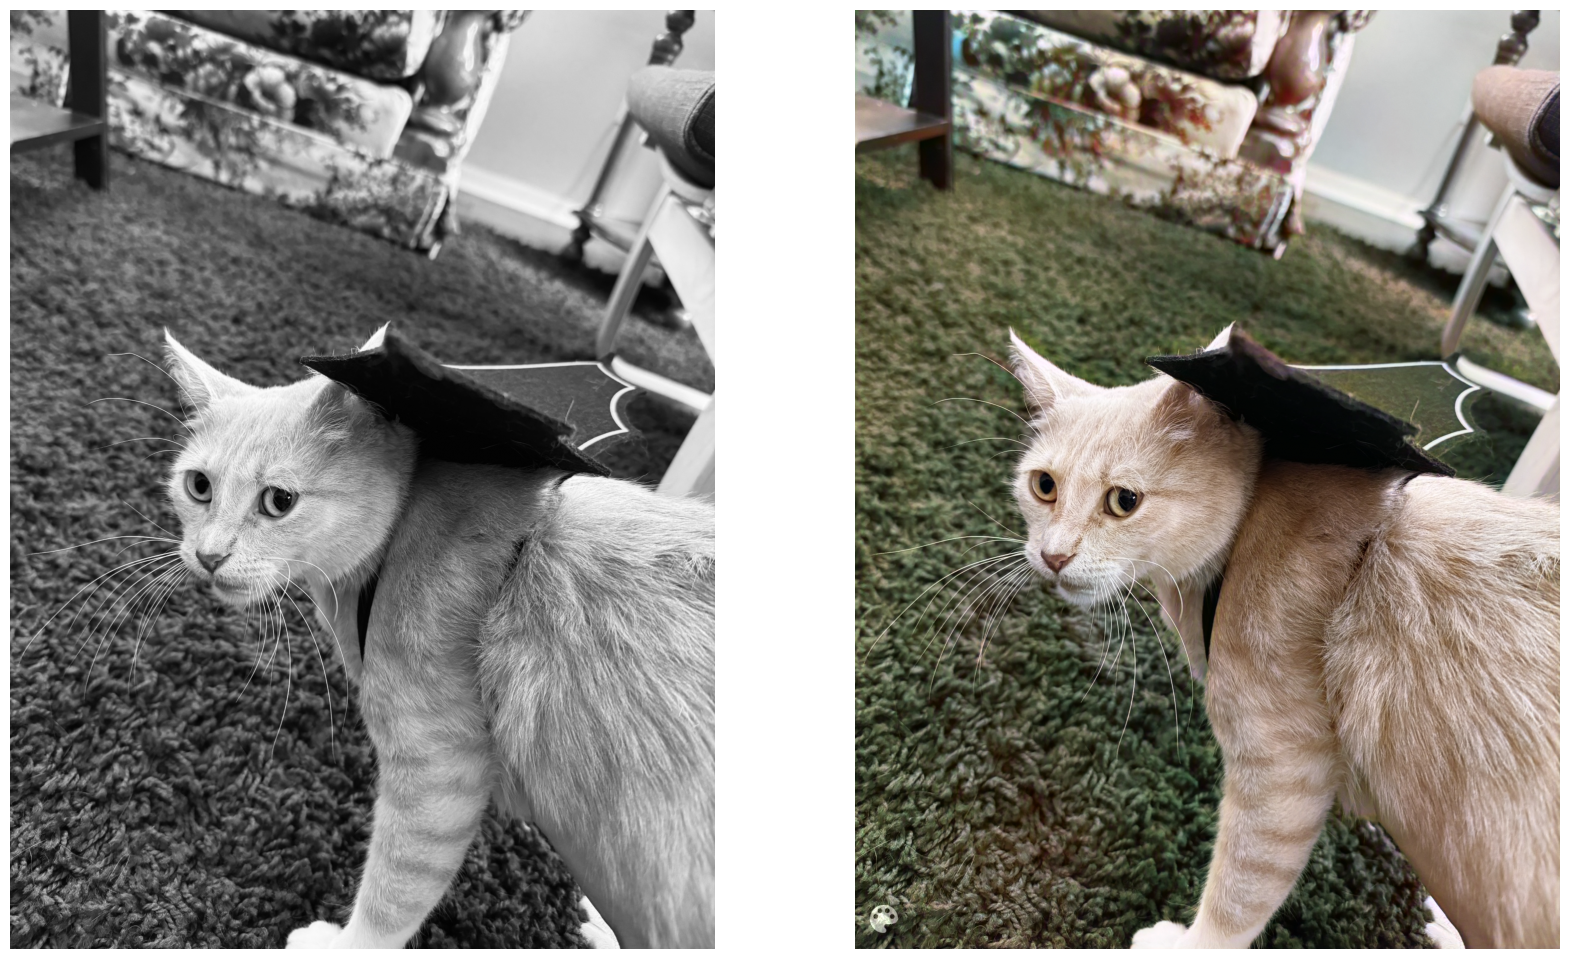

In [ ]:
import cv2
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output


# Upload multiple images
upload_button = widgets.FileUpload(accept='image/*', multiple=True)
display(upload_button)

# Slider to control render factor
render_factor_slider = widgets.IntSlider(value=35, min=7, max=80, step=1, description='Render Factor')
display(render_factor_slider)

# Watermark option
watermark_checkbox = widgets.Checkbox(value=True, description='Watermarked')
display(watermark_checkbox)

# Trigger colorization
colorize_button = widgets.Button(description="Colorize Image(s)")
display(colorize_button)

# Clear uploaded images
clear_button = widgets.Button(description="Clear Images(s)")
display(clear_button)

# Function to colorize uploaded images
def save_and_colorize(b):
    """
    Colorizes uploaded images and displays the results.

    This function iterates through uploaded image files, saves them locally,
    colorizes them using the DeOldify model, and displays the colorized
    images alongside the original grayscale images for comparison.

    The function uses the `render_factor` and `watermark` settings from
    the corresponding widgets to control the colorization process.
    If no images are uploaded, it prints a message to the user.

    Args:
        b: The button widget that triggers the function. This argument is not used
           within the function but is required by the `on_click` method.
    """
    max_height = 1080
    max_width = 1920
    if len(upload_button.value) > 0:
        # Iterate through all uploaded files
        for i, uploaded_file in enumerate(upload_button.value.values()):
            content = uploaded_file['content']

            # Save each uploaded image to a file
            image_path = f'uploaded_image_{i}.jpg'
            with open(image_path, 'wb') as f:
                f.write(content)

            #read image path using CV
            image = cv2.imread(image_path)
            #get image dimensions
            height, width = image.shape[:2]
            #Resize if needed
            if width > max_width or height > max_height:
                image_path = resize_image(image_path, max_width, max_height)

            # Colorize the image from the file path and display it
            image_output_path = colorizer.plot_transformed_image(image_path,
                                                                 render_factor=render_factor_slider.value,
                                                                 compare=True,
                                                                 watermarked=watermark_checkbox.value)
            display(image_output_path)
    else:
        print("Please upload one or more images to colorize.")

def clear_images(b):
    """
    Clears uploaded images and resets the UI.

    This function clears the uploaded images from the file upload widget,
    resets the widget's counter, and clears the output area. It then
    redisplays the UI widgets (upload button, sliders, and buttons) to
    allow for a fresh start.

    Args:
        b: The button widget that triggers the function. This argument is not used
          within the function but is required by the `on_click` method.
    """
    # Clear the output and reset the file upload widget
    upload_button.value.clear()
    upload_button._counter = 0
    clear_output(wait=True)

    # Redisplay the widgets
    display(upload_button)
    display(render_factor_slider)
    display(watermark_checkbox)
    display(colorize_button)
    display(clear_button)

colorize_button.on_click(save_and_colorize)

clear_button.on_click(clear_images)

# Function to resize image while maintaining aspect ratio
def resize_image(image_path, max_height, max_width):
    """
    Resizes an image while maintaining aspect ratio.

    This function takes an image path, maximum height, and maximum width as input.
    It reads the image, calculates its aspect ratio, and determines new dimensions
    that fit within the specified maximum height and width while preserving the
    aspect ratio.

    The resized image is saved to a new file with the prefix "resized_" added to
    the original filename.

    Args:
        image_path (str): The path to the image file.
        max_height (int): The maximum allowed height for the resized image.
        max_width (int): The maximum allowed width for the resized image.

    Returns:
        str: The path to the resized image file.
    """
    #read image path
    image = cv2.imread(image_path)
    #get image dimensions
    height, width = image.shape[:2]
    # Calculate aspect ratio
    aspect_ratio = width / height
    # Determine new dimensions
    if width > height:
        new_width = min(max_width, width)
        new_height = int(new_width / aspect_ratio)
    else:
        new_height = min(max_height, height)
        new_width = int(new_height * aspect_ratio)

    #Save resized image into new directory
    if (max_height > 200):
      #Save resized image into new directory
      resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)
      resized_path = f'resized_{image_path}'
      cv2.imwrite(resized_path, resized_image)
      #return the new path
      return resized_path
    else:
        directory_name = os.path.dirname(image_path)
        file_name = os.path.basename(image_path)
        if "color" in directory_name:
          new_directory = os.path.join(directory_name, 'resized_color')
          return new_directory
        else :
          new_directory = os.path.join(directory_name, 'resized_gray')
          return new_directory



In [ ]:
import kagglehub

# Get the dataset from kaggle
path = kagglehub.dataset_download("theblackmamba31/landscape-image-colorization")

print("Path to dataset files:", path)

100%|██████████| 192M/192M [00:01<00:00, 141MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/theblackmamba31/landscape-image-colorization/versions/4


Button(description='Colorize and Compare', style=ButtonStyle())

Mean Loss =  357.69754
Mean Absolute Loss =  14.22847


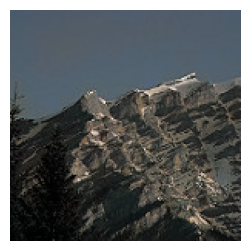

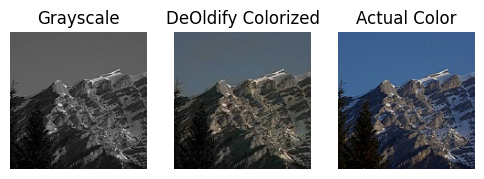

Mean Loss =  348.07415
Mean Absolute Loss =  12.09296


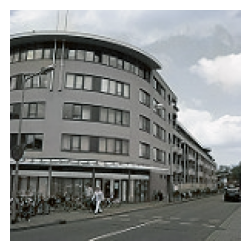

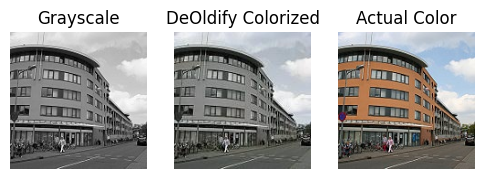

Mean Loss =  335.52637
Mean Absolute Loss =  12.69704


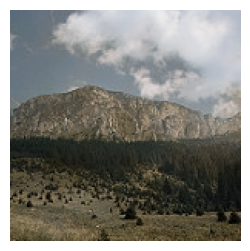

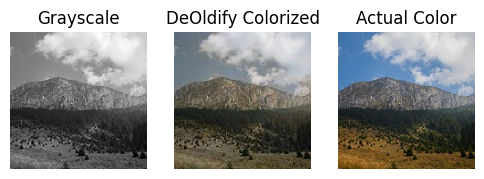

Mean Loss =  424.13289
Mean Absolute Loss =  15.99763


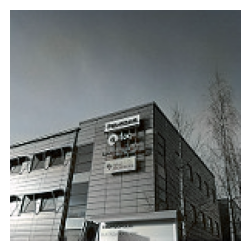

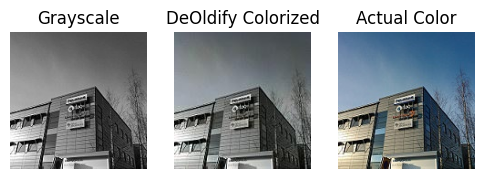

Mean Loss =  627.71876
Mean Absolute Loss =  20.5859


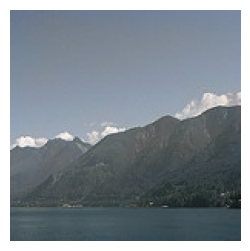

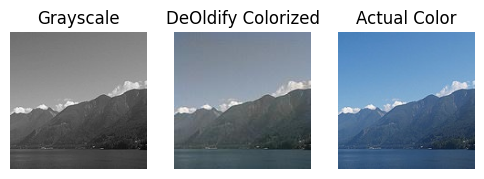

In [ ]:
import cv2
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output
import os
import random
import sklearn as sk
from pathlib import Path
from sklearn import metrics


img_height = 150
img_width = 150
grayscale_folder = '/root/.cache/kagglehub/datasets/theblackmamba31/landscape-image-colorization/versions/4/landscape Images/gray'
color_folder = '/root/.cache/kagglehub/datasets/theblackmamba31/landscape-image-colorization/versions/4/landscape Images/color'

# Get all the images in the grayscale and color folders
gray_images = list(Path(grayscale_folder).glob('*.jpg'))
color_images = list(Path(color_folder).glob('*.jpg'))

# Randomly sample 100 images
subset_gray_images = random.sample(gray_images, 100)
# Find the pairs for those 100 images
subset_color_images = []
for image_path in subset_gray_images:
  file_name = os.path.basename(image_path)
  color_image_path = os.path.join(color_folder, file_name)
  subset_color_images.append(color_image_path)

# Create Path objects for resized image directories
# This is the key change: creating Path objects for the directories
resized_gray_folder = Path(grayscale_folder) / 'resized_gray'
resized_color_folder = Path(color_folder) / 'resized_color'

# Create directories for resized images
resized_gray_folder.mkdir(parents=True, exist_ok=True)
resized_color_folder.mkdir(parents=True, exist_ok=True)

# Resize and save grayscale images
for image_path in subset_gray_images:
    resize_image(image_path, max_height=64, max_width=64)
    os.rename(image_path, os.path.join(resized_gray_folder, os.path.basename(image_path)))

# Resize and save color images
for image_path in subset_color_images:
    resize_image(image_path, max_height=64, max_width=64)
    os.rename(image_path, os.path.join(resized_color_folder, os.path.basename(image_path)))

number_of_pics = widgets.IntSlider(value=1, min=1, max=100, step=1, description='Number of Comparisons')
display(number_of_pics)

mean_loss_function = widgets.Checkbox(value=True, description='Mean Loss Function')
display(mean_loss_function)

mean_absolute_loss_function = widgets.Checkbox(value=True, description='Mean Absolute Loss Function')
display(mean_absolute_loss_function)

# Button to trigger colorization and comparison
compare_button = widgets.Button(description="Colorize and Compare")
display(compare_button)

# Function to colorize grayscale images and compare with actual color images
def colorize_and_compare(b):
    """
    Colorizes grayscale images and compares them to their actual color versions.

    This function randomly selects a specified number of grayscale landscape images,
    colorizes them using DeOldify, and displays them alongside their original
    grayscale and actual color counterparts for comparison.

    It uses a predefined render factor of 40 for colorization and disables
    watermarking. The function also calculates and prints the mean absolute error
    (or mean squared error, depending on user selection) between the DeOldify
    colorized image and the actual color image.

    Args:
        b: The button widget that triggers the function. This argument is not used
          within the function but is required by the `on_click` method.
    """
    clear_output(wait=True)
    display(compare_button)

    grayscale_images = sorted(os.listdir(grayscale_folder))
    color_images = sorted(os.listdir(color_folder))

    for i in range(number_of_pics.value):
        rand = random.randint(0, len(grayscale_images))
        gray_image_name = str(rand) + '.jpg'
        color_image_name = str(rand) + '.jpg'

        # Construct the full paths
        gray_image_path = os.path.join(grayscale_folder, gray_image_name)
        color_image_path = os.path.join(color_folder, color_image_name)

        # Colorize the grayscale image using DeOldify
        deoldify_color_path = colorizer.plot_transformed_image(gray_image_path,
                                                               render_factor=40,
                                                               figsize=(3, 3),
                                                               compare=False,
                                                               watermarked=False)

        # Load images
        grayscale_img = Image.open(gray_image_path).convert("L")  # Convert to grayscale mode
        deoldify_img = Image.open(deoldify_color_path)
        color_img = Image.open(color_image_path)

        # Convert images to NumPy arrays
        grayscale_img = np.array(grayscale_img)
        deoldify_img = np.array(deoldify_img)
        color_img = np.array(color_img)

        if mean_loss_function.value:
          print("Mean Loss = ", round(calc_mean_loss(deoldify_img, color_img), 5))
        if mean_absolute_loss_function.value:
          print("Mean Absolute Loss = ", round(calc_mean_absolute_loss(deoldify_img, color_img), 5))

        # Display the grayscale, DeOldify colorized, and actual color image side by side
        fig, axs = plt.subplots(1, 3, figsize=(6, 6))
        axs[0].imshow(grayscale_img, cmap='gray')
        axs[0].set_title('Grayscale')
        axs[0].axis('off')

        axs[1].imshow(deoldify_img)
        axs[1].set_title('DeOldify Colorized')
        axs[1].axis('off')

        axs[2].imshow(color_img)
        axs[2].set_title('Actual Color')
        axs[2].axis('off')

        plt.show()

# Mean Absolute Error Function
def calc_mean_absolute_loss(img1, img2):
    """

    """
    loss = np.float64(0)
    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    img1 = img1.flatten()
    img2 = img2.flatten()

    loss = sk.metrics.mean_absolute_error(img1, img2)

    return loss
# Mean Squared Error Function
def calc_mean_loss(img1, img2):
    """

    """
    loss = np.float64(0)
    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    img1 = img1.flatten()
    img2 = img2.flatten()

    loss = sk.metrics.mean_squared_error(img1, img2)

    return loss

compare_button.on_click(colorize_and_compare)

In [ ]:
# **Imports for Fine-Tuning Src: https://github.com/jantic/DeOldify/blob/master/ColorizeTrainingArtistic.ipynb**
import os
import fastai
from fastai import *
from fastai.vision import *
from fastai.callbacks.tensorboard import *
from fastai.vision.gan import *
from deoldify.generators import *
from deoldify.critics import *
from deoldify.dataset import *
from deoldify.loss import *
from deoldify.save import *
from PIL import Image, ImageDraw, ImageFont
from PIL import ImageFile
from torch.utils.data import Subset
import warnings


In [ ]:
# **Paths to datasets**
path = Path('/root/.cache/kagglehub/datasets/theblackmamba31/landscape-image-colorization/versions/4/landscape Images')
path_hr = path / 'color' / 'resized_color'  # Path for high-resolution (color) images
path_lr = path / 'gray' / 'resized_gray'   # Path for low-resolution (grayscale) images

# **Project identifier**
proj_id = 'ArtisticModel'  # Identifier for the project

# **Fine-tune model save paths**
proj_id = 'finetune_model'  # Update project ID for fine-tuning
gen_name = proj_id + '_gen'  # Generator model name
pre_gen_name = gen_name + '_0'  # Pre-trained generator model name
crit_name = proj_id + '_crit'  # Critic model name

# **Directory for generated images**
name_gen = proj_id + '_image_gen'  # Folder name for storing generated images
path_gen = path / name_gen  # Full path for generated images

# **TensorBoard log path**
TENSORBOARD_PATH = Path('/root/.cache/kagglehub/tensorboard/' + proj_id)  # Path for logging with TensorBoard

# **Hyperparameters**
nf_factor = 1.5  # Factor controlling the number of filters in the U-Net architecture
pct_start = 1e-8  # Starting percentage of the training cycle used for increasing the learning rate


In [ ]:
# **Function to retrieve training and validation datasets**
def get_data(bs:int, sz:int, keep_pct:float):
    """
    Retrieves datasets for training and validation.

    Parameters:
    - bs (int): Batch size.
    - sz (int): Image size.
    - keep_pct (float): Percentage of data to keep for training.

    Returns:
    - DataBunch object containing grayscale (input) and color (target) images.
    """
    return get_colorize_data(sz=sz, bs=bs, crappy_path=path_lr, good_path=path_hr,
                             random_seed=None, keep_pct=keep_pct)

# **Function to retrieve data for critic training**
def get_crit_data(classes, bs, sz):
    """
    Prepares a dataset for training the critic model, which evaluates the quality of the generated images.

    Parameters:
    - classes (list): Image categories (e.g., grayscale, color).
    - bs (int): Batch size.
    - sz (int): Image size.

    Returns:
    - DataBunch object for critic training.
    """
    src = ImageList.from_folder(path, include=classes, recurse=True).split_by_rand_pct(0.1, seed=42)  # Split data
    ll = src.label_from_folder(classes=classes)  # Label data by folder structure
    data = (ll.transform(get_transforms(max_zoom=2.), size=sz)  # Apply data augmentation
           .databunch(bs=bs).normalize(imagenet_stats))  # Create and normalize DataBunch
    return data

# **Function to create grayscale training images**
def create_training_images(fn, i):
    """
    Converts color images to grayscale and saves them as training inputs.

    Parameters:
    - fn: File path of the original color image.
    - i: Index (not used in this function).
    """
    dest = path_lr / fn.relative_to(path_hr)  # Destination path for the grayscale image
    dest.parent.mkdir(parents=True, exist_ok=True)  # Ensure destination directory exists
    img = PIL.Image.open(fn).convert('LA').convert('RGB')  # Convert to grayscale, then back to RGB
    img.save(dest)  # Save the resulting image

# **Function to save predictions (generated images)**
def save_preds(dl):
    """
    Saves predictions (generated images) from the generator model.

    Parameters:
    - dl: DataLoader containing images to generate predictions for.
    """
    i = 0
    names = dl.dataset.items  # List of dataset image file paths

    for b in dl:  # Iterate over batches
        preds = learn_gen.pred_batch(batch=b, reconstruct=True)  # Generate predictions
        for o in preds:  # Iterate over predictions
            o.save(path_gen / names[i].name)  # Save each generated image
            i += 1

# **Function to save generated images**
def save_gen_images():
    """
    Generates and saves images using the fine-tuned generator model.
    Deletes existing generated images before saving the new ones.
    """
    if path_gen.exists(): shutil.rmtree(path_gen)  # Remove existing generated images
    path_gen.mkdir(exist_ok=True)  # Create directory for generated images
    data_gen = get_data(bs=bs, sz=sz, keep_pct=0.085)  # Load a subset of the dataset
    save_preds(data_gen.fix_dl)  # Generate and save predictions
    PIL.Image.open(path_gen.ls()[0])  # Open the first generated image (for visualization)

In [ ]:
#This is here in case it's a dataset with only colored images. Ours is not so this is not entered.
if not path_lr.exists():
    il = ImageList.from_folder(path_hr)
    parallel(create_training_images, il.items)

In [ ]:
# Getting rid of a non-problematic warning
warnings.filterwarnings("ignore", category=UserWarning)
# **Training parameters**
bs = 10  # Batch size
sz = 64  # Image size
keep_pct = 1.0  # Use 100% of the data for training
data_gen = get_data(bs=bs, szw=sz, keep_pct=keep_pct)  # Load dataset for generator training


# **Define and configure the generator model**
learn_gen = gen_learner_deep(data=data_gen, gen_loss=FeatureLoss(), nf_factor=nf_factor)  # U-Net with ResNet backbone
learn_gen.callback_fns.append(partial(ImageGenTensorboardWriter, base_dir=TENSORBOARD_PATH, name='GenPre'))  # TensorBoard logging

# **First training phase (with frozen layers)**
learn_gen.fit_one_cycle(1, pct_start=0.8, max_lr=slice(1e-3))  # Train with a cyclical learning rate
learn_gen.save(pre_gen_name)  # Save the model's weights after the first phase

# **Second training phase (with unfrozen layers)**
learn_gen.unfreeze()  # Unfreeze all layers for fine-tuning
learn_gen.fit_one_cycle(1, pct_start=pct_start, max_lr=slice(3e-7, 3e-4))  # Fine-tune with progressive learning rates
learn_gen.save(pre_gen_name)  # Save the fine-tuned model

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth
100%|██████████| 528M/528M [00:03<00:00, 183MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/utils/weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


epoch,train_loss,valid_loss,time
0,6.309494,5.693112,00:05


INFO:tensorboardX.summary:Summary name /metrics/valid_loss is illegal; using metrics/valid_loss instead.


Summary name /metrics/valid_loss is illegal; using metrics/valid_loss instead.


epoch,train_loss,valid_loss,time
0,5.642988,5.206207,00:04


INFO:tensorboardX.summary:Summary name /metrics/valid_loss is illegal; using metrics/valid_loss instead.


Summary name /metrics/valid_loss is illegal; using metrics/valid_loss instead.


In [ ]:
bs=5
sz=64
keep_pct=1.0
learn_gen.data = get_data(sz=sz, bs=bs, keep_pct=keep_pct)
learn_gen.unfreeze()
learn_gen.fit_one_cycle(1, pct_start=pct_start, max_lr=slice(1e-7,1e-4))
learn_gen.save(pre_gen_name)

epoch,train_loss,valid_loss,time
0,5.430327,4.989362,00:05


INFO:tensorboardX.summary:Summary name /metrics/valid_loss is illegal; using metrics/valid_loss instead.


Summary name /metrics/valid_loss is illegal; using metrics/valid_loss instead.


In [ ]:
bs=2
sz=64
keep_pct=0.50
learn_gen.data = get_data(sz=sz, bs=bs, keep_pct=keep_pct)
learn_gen.unfreeze()
learn_gen.fit_one_cycle(1, pct_start=pct_start, max_lr=slice(5e-8,5e-5))
learn_gen.save(pre_gen_name)

epoch,train_loss,valid_loss,time
0,5.247376,8.212519,00:05


INFO:tensorboardX.summary:Summary name /metrics/valid_loss is illegal; using metrics/valid_loss instead.


Summary name /metrics/valid_loss is illegal; using metrics/valid_loss instead.


In [ ]:
old_checkpoint_num = 0
checkpoint_num = old_checkpoint_num + 1
gen_old_checkpoint_name = gen_name + '_' + str(old_checkpoint_num)
gen_new_checkpoint_name = gen_name + '_' + str(checkpoint_num)
crit_old_checkpoint_name = crit_name + '_' + str(old_checkpoint_num)
crit_new_checkpoint_name= crit_name + '_' + str(checkpoint_num)

In [ ]:
bs=8
sz=64
learn_gen = gen_learner_deep(data=data_gen, gen_loss=FeatureLoss(), nf_factor=nf_factor).load(gen_old_checkpoint_name, with_opt=False)
save_gen_images()

/usr/local/lib/python3.10/dist-packages/torch/nn/utils/weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)
/content/DeOldify/fastai/basic_train.py:322: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any u